## Introduction
This project aims to analyze loan data to identify patterns and factors that influence loan defaults. By using Exploratory Data Analysis (EDA), we will uncover insights that can help in making better lending decisions.


In [1]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Datasets

In [3]:
# Load the datasets
application_data = pd.read_csv(r"C:\Users\vardh\Downloads\application_data.csv")

In [4]:
previous_application = pd.read_csv(r"C:\Users\vardh\Downloads\previous_application.csv")

In [5]:
columns_description = pd.read_csv(r"C:\Users\vardh\Downloads\columns_description (1).csv", encoding='ISO-8859-1')



In [6]:
# Display the first few rows of each dataset
print("Application Data:")
display(application_data.head())


Application Data:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
print("\nPrevious Application Data:")
display(previous_application.head())



Previous Application Data:


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print("\nColumns Description:")
display(columns_description.head())



Columns Description:


,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


### Basic understanding of the dataset, including the shape, data types, and any missing values.

In [10]:
# Check the structure of the dataset
print("Shape of the dataset:", application_data .shape)
print("\nData Types:\n", application_data .dtypes)



Shape of the dataset: (307511, 122)

Data Types:
 SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object


In [12]:
# Check the structure of the dataset
print("Shape of the dataset:", columns_description.shape)
print("\nData Types:\n", columns_description .dtypes)

Shape of the dataset: (160, 5)

Data Types:
 Unnamed: 0      int64
Table          object
Row            object
Description    object
Special        object
dtype: object


In [11]:
# Check the structure of the dataset
print("Shape of the dataset:", previous_application .shape)
print("\nData Types:\n", previous_application.dtypes)

Shape of the dataset: (1670214, 37)

Data Types:
 SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_T

In [13]:
# Check for missing values
print("\nMissing Values:\n", application_data.isnull().sum())


Missing Values:
 SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


In [14]:
print("\nMissing Values:\n", previous_application.isnull().sum())


Missing Values:
 SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL

In [15]:
print("\nMissing Values:\n", columns_description.isnull().sum())


Missing Values:
 Unnamed: 0      0
Table           0
Row             0
Description     0
Special        91
dtype: int64


In [7]:
# Identify missing data
missing_data = application_data.isnull().sum()
missing_data_percentage = (missing_data / len(application_data)) * 100

# Display columns with missing data above a certain threshold
missing_data_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_data_percentage})
print(missing_data_df[missing_data_df['Percentage'] > 0].sort_values(by='Percentage', ascending=False))


                          Missing Values  Percentage
COMMONAREA_MEDI                   214865   69.872297
COMMONAREA_AVG                    214865   69.872297
COMMONAREA_MODE                   214865   69.872297
NONLIVINGAPARTMENTS_MEDI          213514   69.432963
NONLIVINGAPARTMENTS_MODE          213514   69.432963
...                                  ...         ...
EXT_SOURCE_2                         660    0.214626
AMT_GOODS_PRICE                      278    0.090403
AMT_ANNUITY                           12    0.003902
CNT_FAM_MEMBERS                        2    0.000650
DAYS_LAST_PHONE_CHANGE                 1    0.000325

[67 rows x 2 columns]


### Check the structure, data types, and missing values for both application_data and previous_application.

In [14]:
# Overview of application_data
print("Application Data Info:")
print(application_data.info())

print("\nMissing Values in Application Data:")
print(application_data.isnull().sum())

# Overview of previous_application
print("\nPrevious Application Data Info:")
print(previous_application.info())

print("\nMissing Values in Previous Application Data:")
print(previous_application.isnull().sum())


Application Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None

Missing Values in Application Data:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

Previous Application Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   16702

### Handle missing values, outliers, and data types

In [15]:
# Handling missing values in application_data
# Example: Dropping columns with more than 50% missing values
application_data = application_data.dropna(thresh=0.5*len(application_data), axis=1)

# Impute missing values for remaining columns
application_data.fillna(application_data.median(), inplace=True)

# Convert categorical columns to numerical (if needed)
application_data = pd.get_dummies(application_data, drop_first=True)

# Handling missing values in previous_application
previous_application = previous_application.dropna(thresh=0.5*len(previous_application), axis=1)
previous_application.fillna(previous_application.median(), inplace=True)
previous_application = pd.get_dummies(previous_application, drop_first=True)

print("Data Cleaning Complete.")


C:\Users\vardh\AppData\Local\Temp\ipykernel_2264\345279141.py:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  application_data.fillna(application_data.median(), inplace=True)
C:\Users\vardh\AppData\Local\Temp\ipykernel_2264\345279141.py:13: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  previous_application.fillna(previous_application.median(), inplace=True)


Data Cleaning Complete.


### Visualize individual variables to understand their distributions.

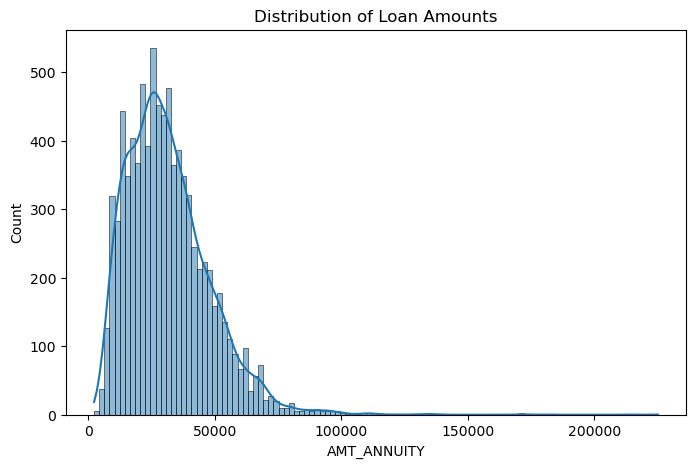

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(application_data['AMT_ANNUITY'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.show()

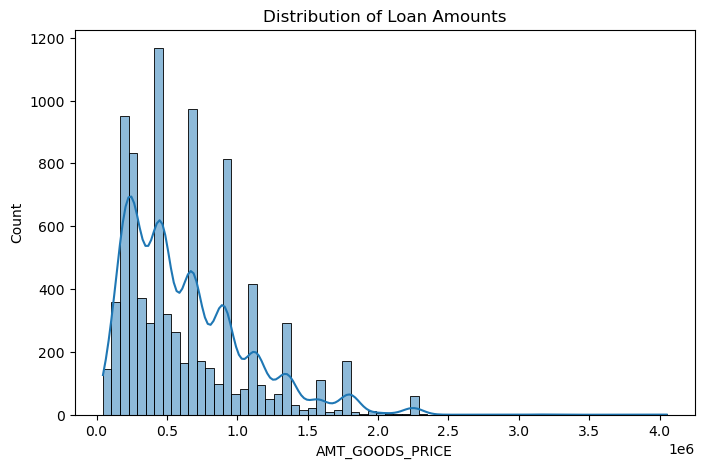

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(application_data['AMT_GOODS_PRICE'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.show()

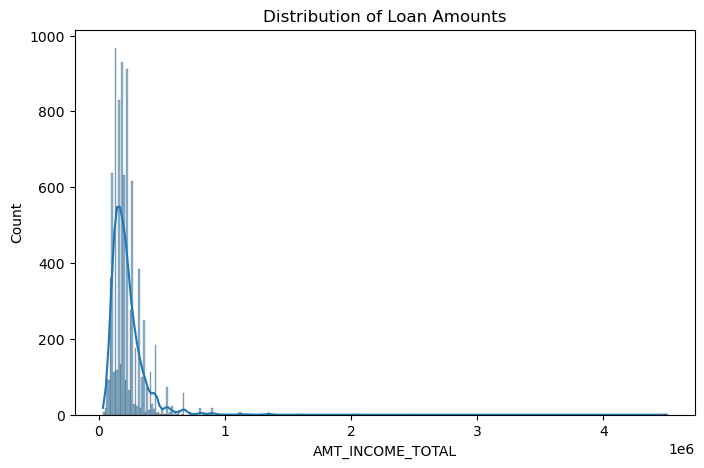

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(application_data['AMT_INCOME_TOTAL'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.show()

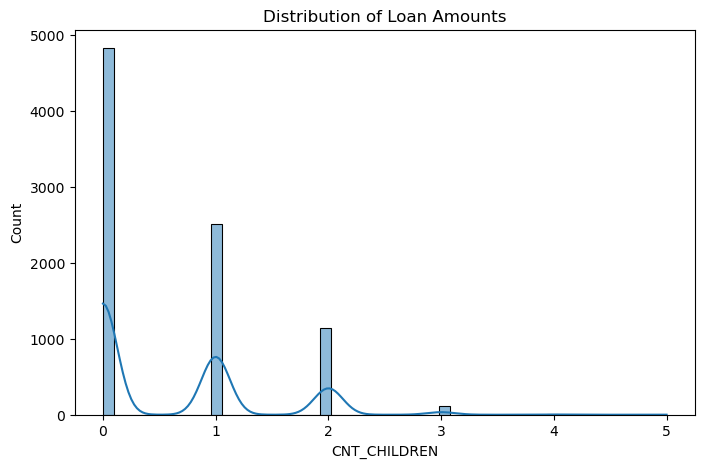

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(application_data['CNT_CHILDREN'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.show()

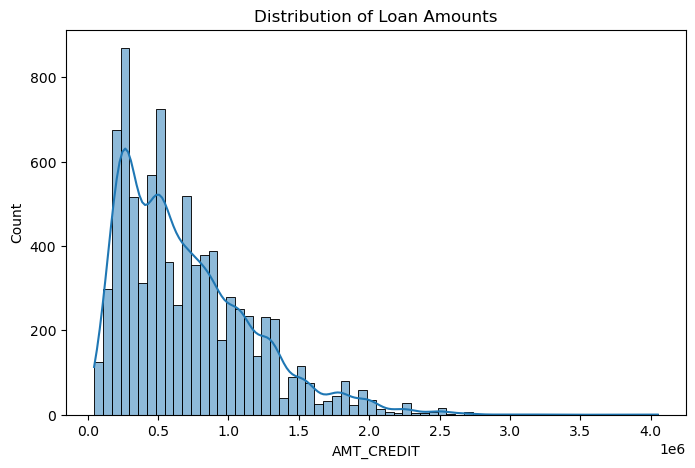

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(application_data['AMT_CREDIT'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.show()

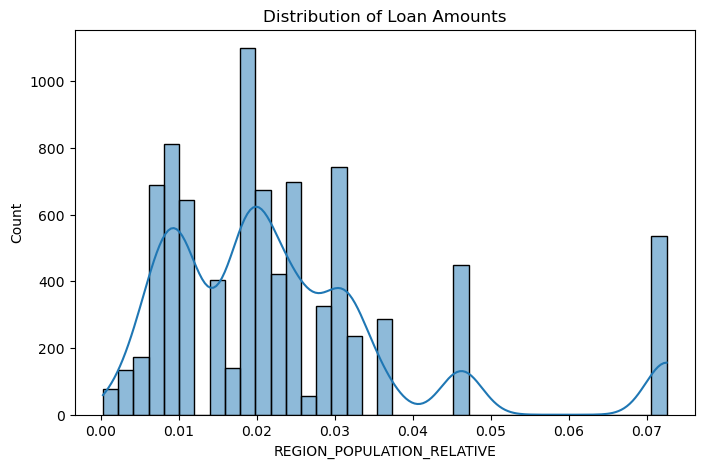

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(application_data['REGION_POPULATION_RELATIVE'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.show()

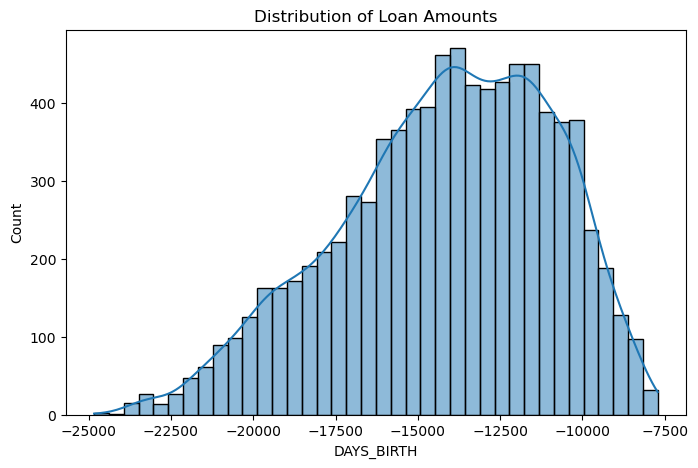

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(application_data['DAYS_BIRTH'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.show()

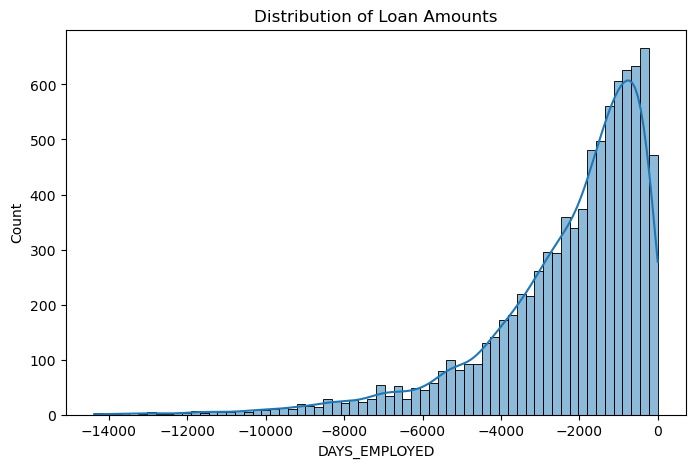

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(application_data['DAYS_EMPLOYED'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.show()

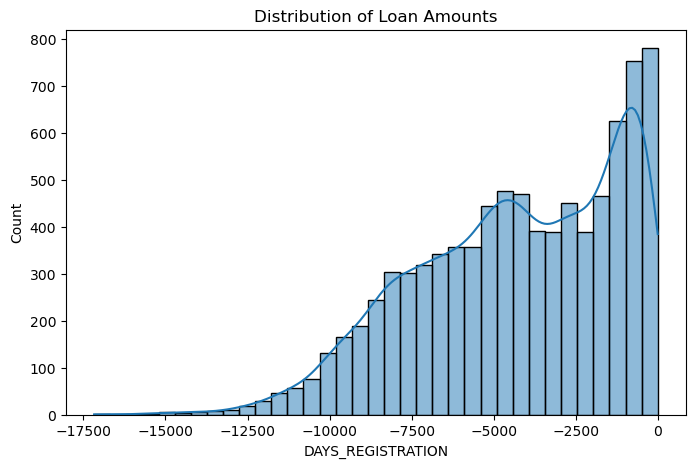

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(application_data['DAYS_REGISTRATION'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.show()

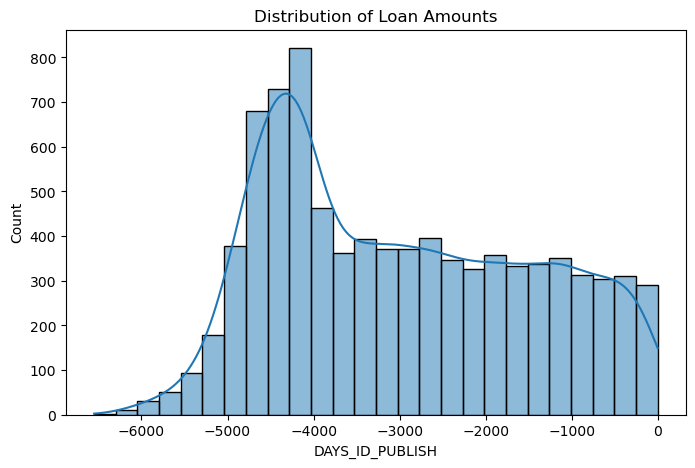

In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(application_data['DAYS_ID_PUBLISH'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.show()

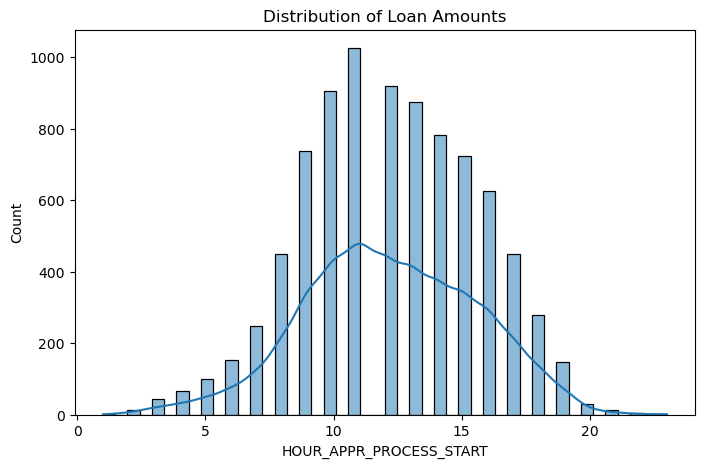

In [32]:
plt.figure(figsize=(8, 5))
sns.histplot(application_data['HOUR_APPR_PROCESS_START'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.show()

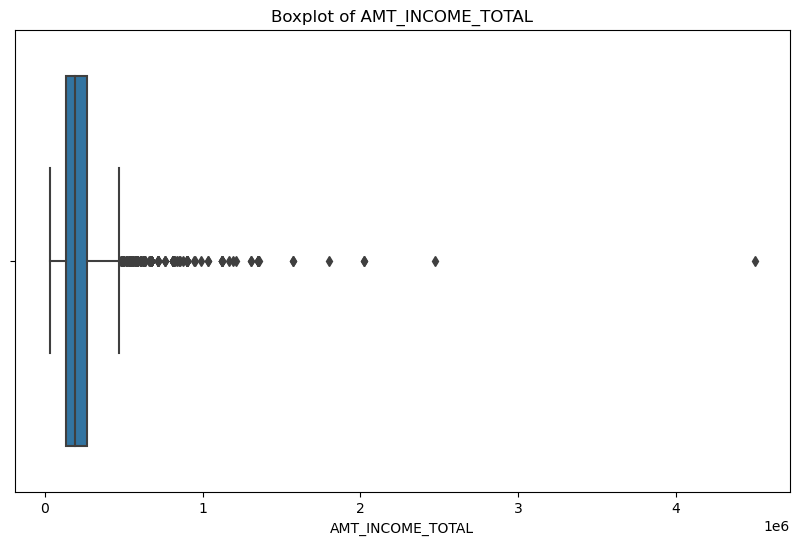

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=application_data['AMT_INCOME_TOTAL'])
plt.title('Boxplot of AMT_INCOME_TOTAL')
plt.show()

0    93.885143
1     6.114857
Name: TARGET, dtype: float64


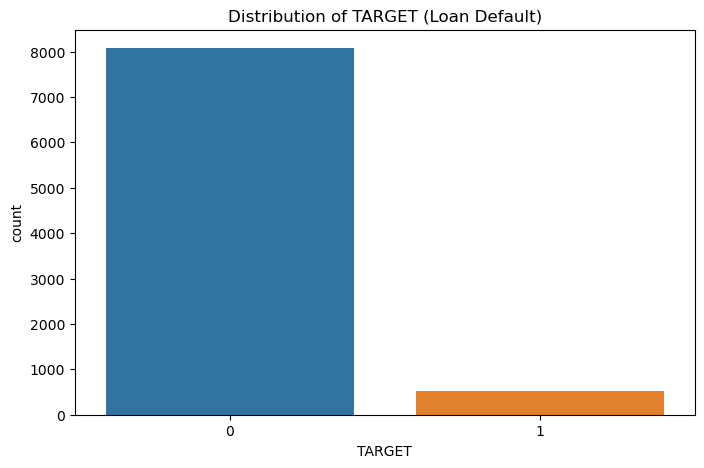

In [50]:
# Check the distribution of the target variable
target_distribution = application_data['TARGET'].value_counts(normalize=True) * 100
print(target_distribution)

# Visualize the imbalance
plt.figure(figsize=(8, 5))
sns.countplot(x='TARGET', data=application_data)
plt.title('Distribution of TARGET (Loan Default)')
plt.show()


### Conduct univariate, bivariate, and multivariate analysis.

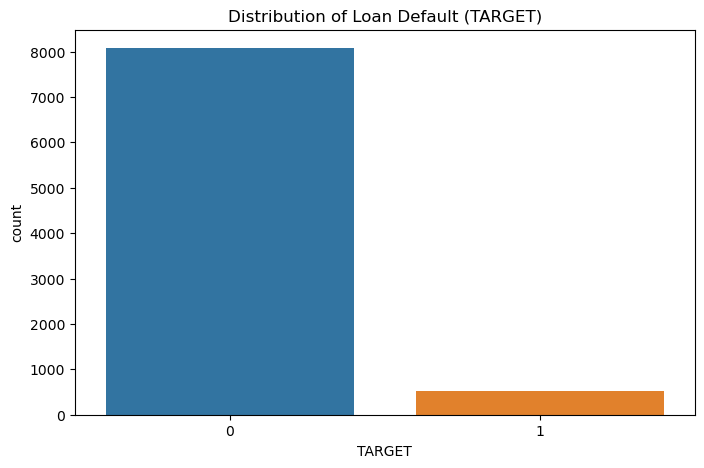

In [33]:
# Univariate Analysis: Distribution of Target Variable (e.g., Default)
plt.figure(figsize=(8, 5))
sns.countplot(x='TARGET', data=application_data)
plt.title('Distribution of Loan Default (TARGET)')
plt.show()

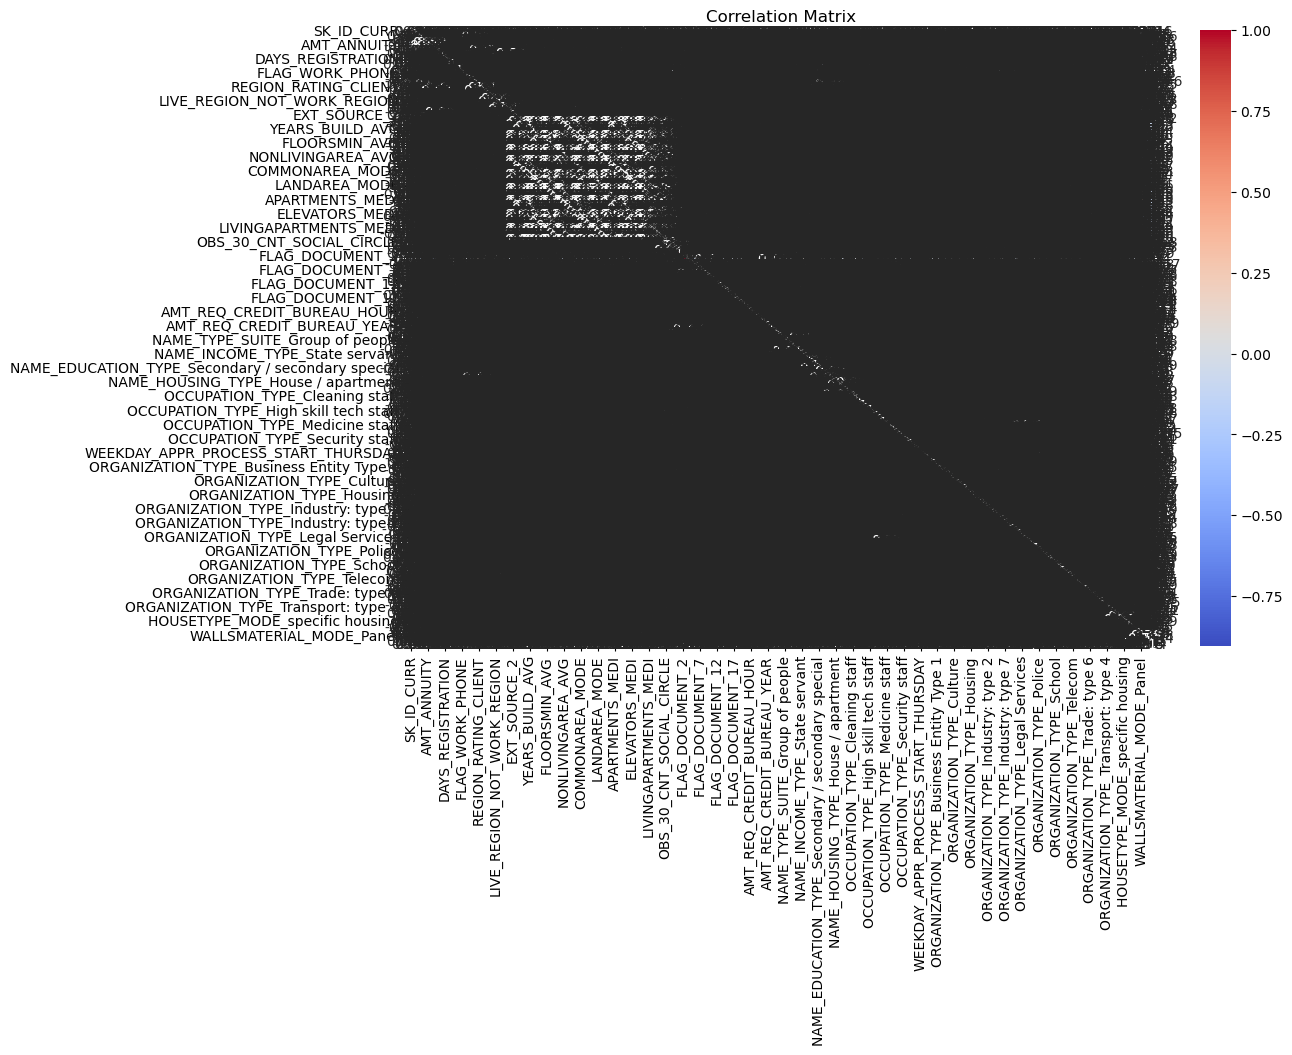

In [34]:
# Bivariate Analysis: Correlation between variables
plt.figure(figsize=(12, 8))
sns.heatmap(application_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

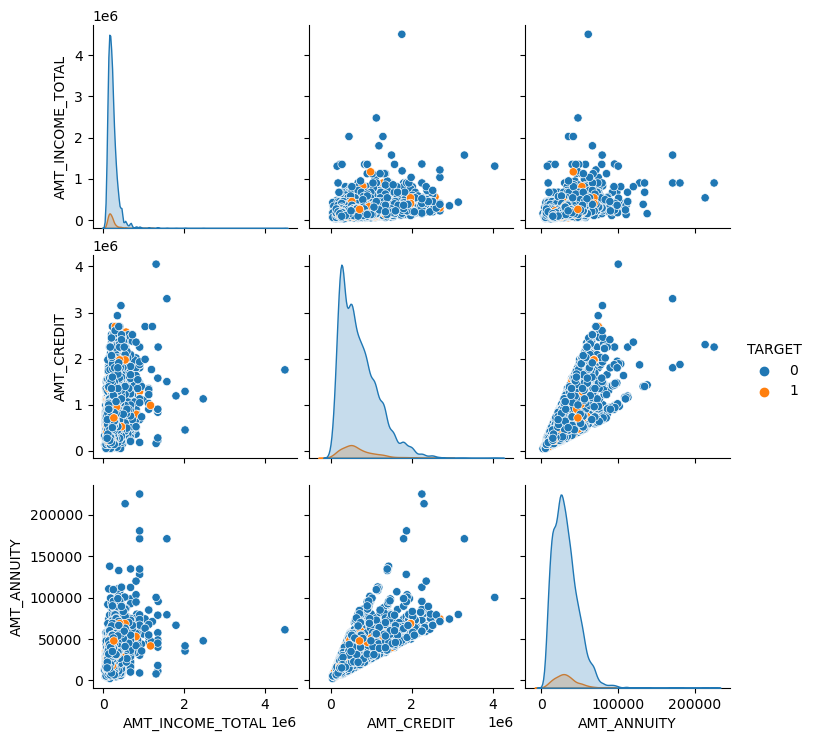

In [35]:
# Multivariate Analysis: Pairplot for selected variables
selected_columns = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'TARGET']
sns.pairplot(application_data[selected_columns], hue='TARGET')
plt.show()

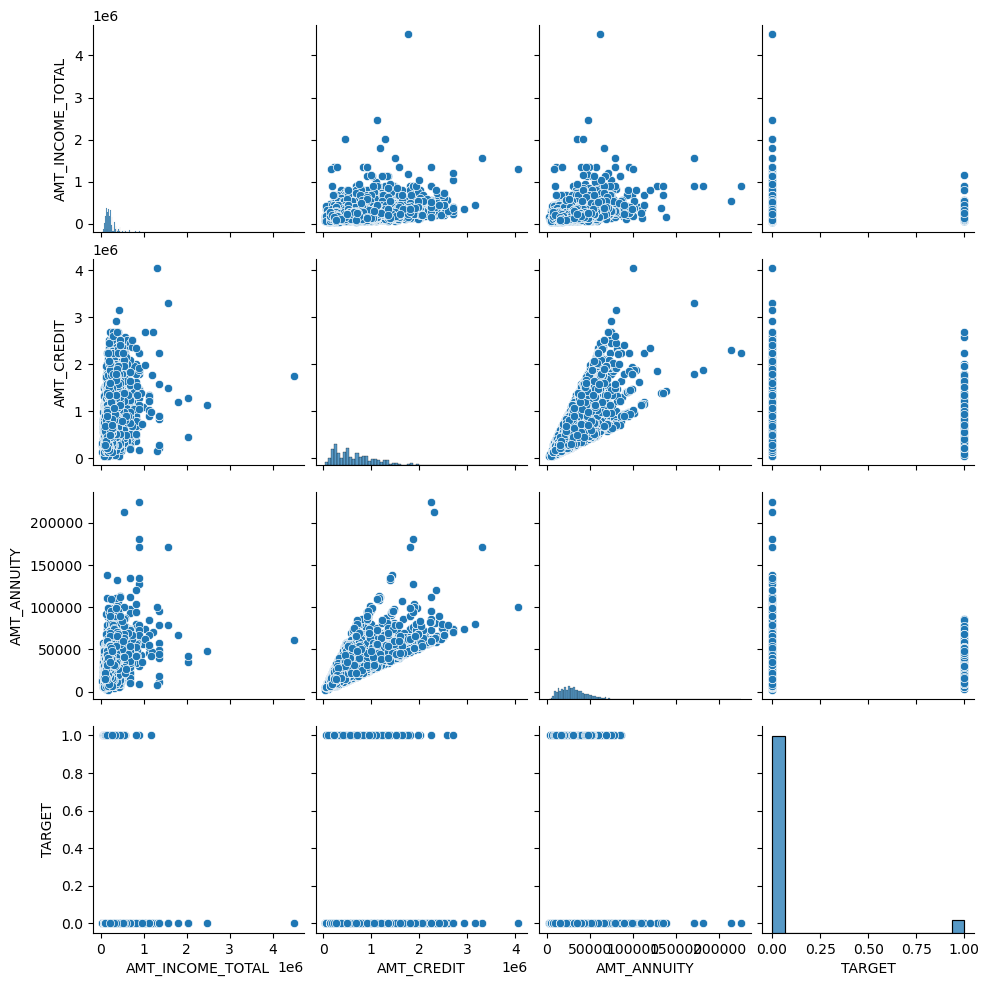

In [41]:
# Pairplot to explore relationships between multiple variables
sns.pairplot(application_data[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'TARGET']])
plt.show()


##### Merging Datasets

In [43]:
# Merge application_data with previous_application on a common identifier
merged_data = pd.merge(application_data, previous_application, on='SK_ID_CURR', how='left')

print("Merged Data Shape:", merged_data.shape)
display(merged_data.head())


Merged Data Shape: (40929, 255)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100083,0,0,103500.0,573628.5,24435.0,463500.0,0.009657,-15406,-892,...,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-768.0,-78.0,-78.0,-71.0,1.0
1,100083,0,0,103500.0,573628.5,24435.0,463500.0,0.009657,-15406,-892,...,Connectivity,10.0,high,POS mobile with interest,365243.0,-2017.0,-1747.0,-1747.0,-1744.0,0.0
2,100083,0,0,103500.0,573628.5,24435.0,463500.0,0.009657,-15406,-892,...,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
3,100145,0,1,202500.0,260725.5,16789.5,198000.0,0.018850,-16282,-4375,...,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1529.0,-119.0,-1349.0,-1345.0,1.0
4,100145,0,1,202500.0,260725.5,16789.5,198000.0,0.018850,-16282,-4375,...,Consumer electronics,10.0,high,POS household with interest,NaN,NaN,NaN,NaN,NaN,NaN


### Analyze high-risk segments and their characteristics.

In [44]:
# Segment high-risk clients based on their TARGET value
high_risk_clients = merged_data[merged_data['TARGET'] == 1]
low_risk_clients = merged_data[merged_data['TARGET'] == 0]




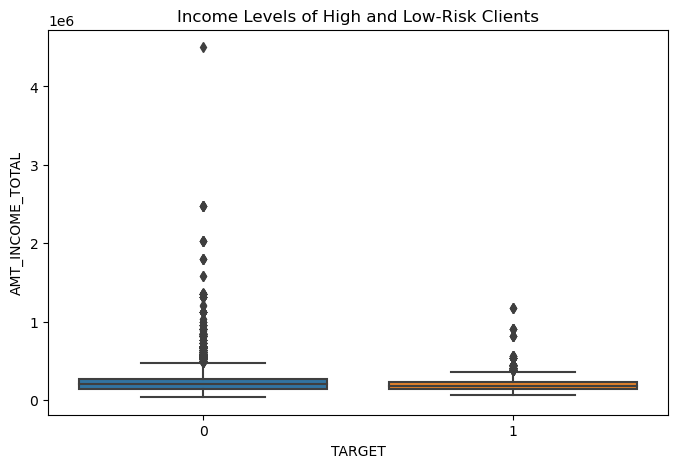

In [45]:
# Compare income levels between high and low-risk clients
plt.figure(figsize=(8, 5))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=merged_data)
plt.title('Income Levels of High and Low-Risk Clients')
plt.show()

In [46]:
# Explore other segmentation variables (e.g., Credit Amount, Annuity)
plt.figure(figsize=(8, 5))
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=merged_data)
plt.title('Credit Amount of High and Low-Risk Clients')
plt.show()

ValueError: Could not interpret input 'AMT_CREDIT'

<Figure size 800x500 with 0 Axes>